MaSp transcription and translation combined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['text.color'] = 'black'

In [3]:
def iteration(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on):
    if tRNA_on == True:
        alanine_tRNA += ((transcription_rate*plasmids)/76) #length of alanine tRNA = 76 base pairs
    if cycA_on == True:
        cycA += ((transcription_rate*plasmids)/1413) #length of cycA mRNA = 1413 base pairs, translation coupled to transcription
    
    intra_alanine += (base_uptake + k_cat * cycA)
    
    if intra_alanine <= alanine_tRNA * 3.35: #if alanine is limiting factor 
        masp += intra_alanine /  80
        intra_alanine = 0 

    else: #if alanine tRNA is limiting factor 
        masp += alanine_tRNA * 3.35 / 80 #if excess of intracellular alanine available
        intra_alanine -= alanine_tRNA * 3.35
        
    return(cycA, alanine_tRNA, intra_alanine, masp)

In [32]:
def yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on, num_iterations):
    alanine_values = [intra_alanine]
    masp_values = [masp]
    tRNA_values = [alanine_tRNA]
    
    for i in range(num_iterations):
        cycA, alanine_tRNA, intra_alanine, masp = iteration(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on)
        alanine_values.append(intra_alanine)
        masp_values.append(masp)
        tRNA_values.append(alanine_tRNA)
    return([alanine_values, masp_values, tRNA_values])

In [36]:
def tRNAvsAlanineplotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on, num_iterations):
    iteration_index = np.arange(num_iterations+1)
    dummy = yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on, num_iterations)
    alanine_values = dummy[0]
    masp_values = dummy[1] 
    tRNA_values = dummy[2]
#     return(tRNA_values)
    plt.figure(figsize=(10,10))
    plt.plot(iteration_index, alanine_values)
    plt.plot(iteration_index, tRNA_values)
    plt.xlabel('Time/s')
    plt.ylabel('Concentration of species/log(molecules/cell)')
    plt.legend(['Alanine', 'tRNA'])

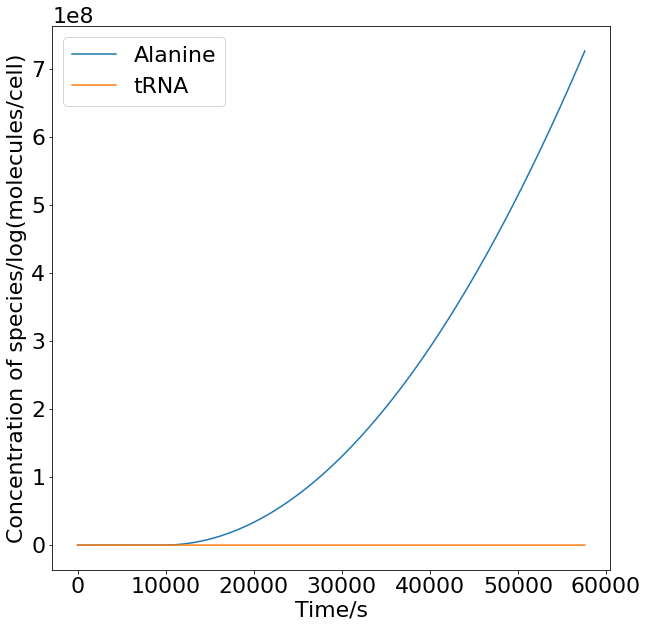

In [41]:
a = tRNAvsAlanineplotter(plasmids=20, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake=7230, k_cat=0.9953, tRNA_on=False, cycA_on=True, num_iterations=57600)

In [27]:
type(a[0])

float

In [5]:
def timecourse_plotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, num_iterations):
    iteration_index = np.arange(num_iterations+1)
    all_alanine_values = []
    all_masp_values = []
    
    
    no_expression = yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, False, False, num_iterations)
    all_alanine_values.append(no_expression[0])
    all_masp_values.append(no_expression[1])
    
    tRNA_expressed = yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, True, False, num_iterations)
    all_alanine_values.append(tRNA_expressed[0])
    all_masp_values.append(tRNA_expressed[1])
    
    cycA_expressed = yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, False, True, num_iterations)
    all_alanine_values.append(cycA_expressed[0])
    all_masp_values.append(cycA_expressed[1])
    
    both_expressed = yield_over_time(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, True, True, num_iterations)
    all_alanine_values.append(both_expressed[0])
    all_masp_values.append(both_expressed[1])
    
    plt.figure(figsize=(10,10))
    plt.plot(iteration_index, np.log(all_masp_values[0]))
    plt.plot(iteration_index, np.log(all_masp_values[1]))
    plt.plot(iteration_index, np.log(all_masp_values[2]))
    plt.plot(iteration_index, np.log(all_masp_values[3]))

    plt.xlabel('Time/s')
    plt.ylabel('log(MaSp concentration)/log(molecules/cell)')
#     plt.legend(['No expression', 'tRNA expressed', 'cycA expressed'])
    plt.legend(['No expression', 'tRNA expressed', 'cycA expressed', 'Both expressed'])
    plt.title('MaSp production over time with varied gene expression')
    plt.savefig('./Figures/ConcentrationVsTime.png', bbox_inches='tight')

<ipython-input-5-163147553276>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(iteration_index, np.log(all_masp_values[0]))
<ipython-input-5-163147553276>:25: RuntimeWarning: divide by zero encountered in log
  plt.plot(iteration_index, np.log(all_masp_values[1]))
<ipython-input-5-163147553276>:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(iteration_index, np.log(all_masp_values[2]))
<ipython-input-5-163147553276>:27: RuntimeWarning: divide by zero encountered in log
  plt.plot(iteration_index, np.log(all_masp_values[3]))


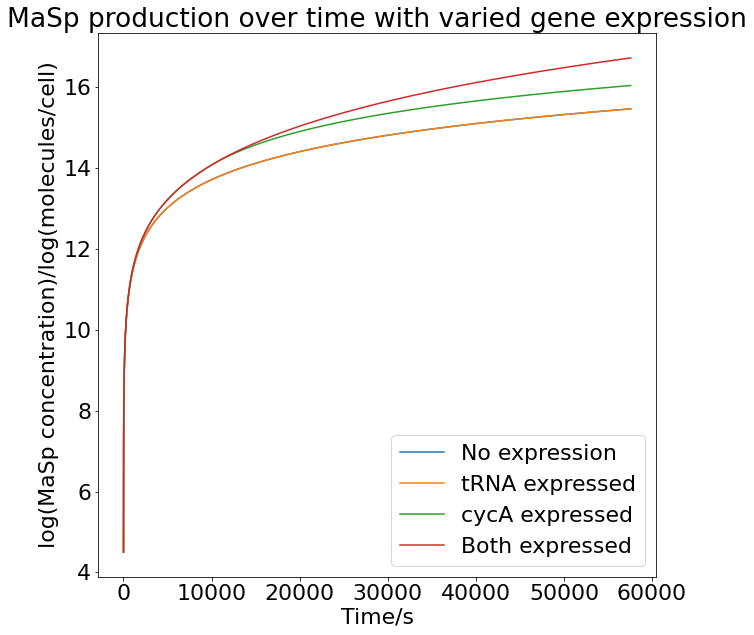

In [6]:
timecourse_plotter(plasmids=20, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake=7230, k_cat=0.9953, num_iterations=57600)

In [14]:
def final_yield(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on, num_iterations):
    alanine_values = []
    masp_values = []

    for i in range(num_iterations):
        cycA, alanine_tRNA, intra_alanine, masp = iteration(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat, tRNA_on, cycA_on)
        alanine_values.append(intra_alanine)
        masp_values.append(masp)
    
    return(masp_values[-1])

In [22]:
def k_cat_plotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat_values, num_iterations):
    masp_yield = [[], [], [], []]
    expression_states = [[False, False], [True, False], [False, True], [True, True]]
#     expression_states = [[False, False], [False, True]]
    for i in range(len(k_cat_values)):
        for j in range(len(expression_states)):
            masp_yield[j].append(final_yield(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake, k_cat_values[i], expression_states[j][0], expression_states[j][1], num_iterations))
    plt.figure(figsize=(10,10))
    for i in range(len(expression_states)):
        plt.plot(k_cat_values, np.log(masp_yield[i]))
    plt.legend(['No expression', 'tRNA expressed', 'cycA expressed', 'Both expressed'], loc=(0.53,0.4))
    plt.xlabel(r'$k_{cat}/s^{-1}$')
    plt.ylabel('MaSp yield/log(molecules/cell)')
    plt.title(r'Final MaSp yield as a function of $k_{cat}$')
    plt.axvline(0.9953, color = 'k', ls = 'dashed')
    plt.savefig('./Figures/ConcentrationVskcat.png', bbox_inches='tight')

CPU times: user 26.4 s, sys: 130 ms, total: 26.5 s
Wall time: 26.1 s


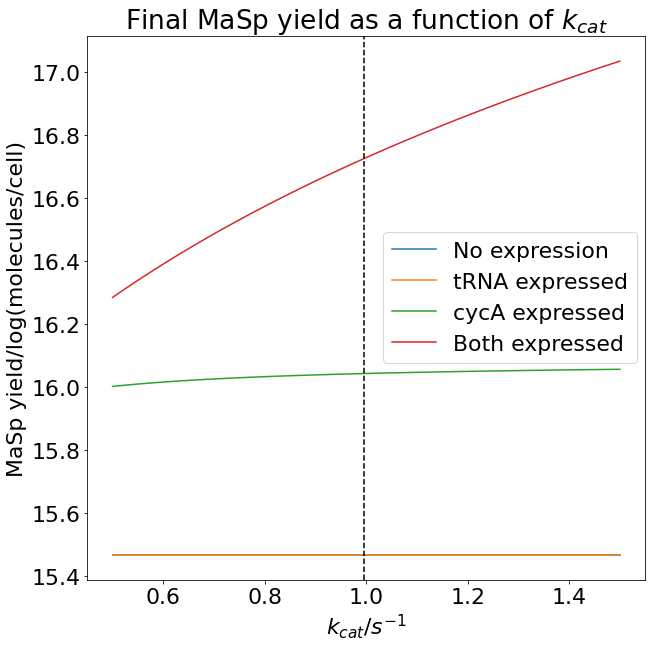

In [23]:
%%time
k_cat_plotter(plasmids=20, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake=7230, k_cat_values=np.linspace(0.5, 1.5, 100), num_iterations=57600)

In [33]:
def base_uptake_plotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values, k_cat, num_iterations):
    masp_yield = [[], [], [], []]
#     expression_states = [[False, False], [False, True]]
    expression_states = [[False, False], [True, False], [False, True], [True, True]]
    for i in range(len(base_uptake_values)):
        for j in range(len(expression_states)):
            masp_yield[j].append(final_yield(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values[i], k_cat, expression_states[j][0], expression_states[j][1], num_iterations))
    plt.figure(figsize=(10,10))
    for i in range(len(expression_states)):
        plt.plot(base_uptake_values, np.log(masp_yield[i]))
    plt.legend(['No expression', 'tRNA expressed', 'cycA expressed', 'Both expressed'], loc = (0.2, 0.01))
#     plt.legend(['No expression', 'cycA expressed'])
    plt.xlabel(r'Base uptake rate/$s^{-1}$')
    plt.ylabel('MaSp yield/log(molecules/cell)')
    plt.axvline(7230, color = 'k', ls = 'dashed')
    plt.title(r'Final MaSp yield as a function of base alanine uptake rate')
    plt.savefig('./Figures/ConcentrationVsBaseUptake.png', bbox_inches='tight')

CPU times: user 24 s, sys: 247 ms, total: 24.3 s
Wall time: 24.7 s


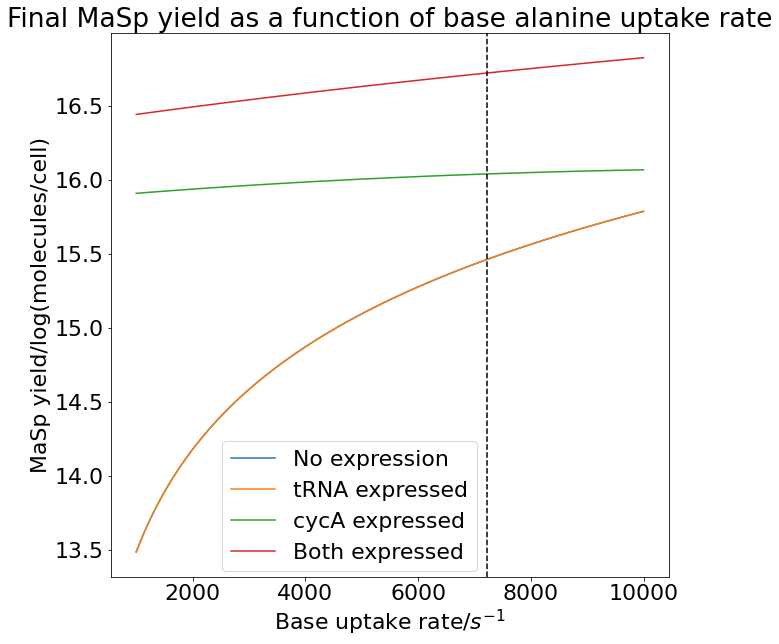

In [34]:
%%time
base_uptake_plotter(plasmids=20, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake_values=np.linspace(1000,10000,100), k_cat=0.9953, num_iterations=57600)

In [12]:
def yield_plotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values, k_cat_values, expression_state, plot_type, num_iterations):
    masp_yield = np.zeros([len(base_uptake_values),len(k_cat_values)])
    for i in range(len(base_uptake_values)):
        for j in range(len(k_cat_values)):
            masp_yield[i][j] = np.log(final_yield(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values[i], k_cat_values[j], expression_state[0], expression_state[1], num_iterations))
    
    if plot_type == '3d':
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,20))
        ax = plt.axes(projection='3d')
        surf = ax.plot_surface(base_uptake_values, k_cat_values, masp_yield, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_xlabel('Base uptake rate (alanines/cell/second)')
        ax.set_ylabel(r'$k_cat$ (alanines/protein/second)')
        ax.set_zlabel('MaSp yield log(molecules/cell)')
        plt.show()
        
    elif plot_type == 'Contour':
        fig,ax=plt.subplots(1,1, figsize=(10,10))
        contours = ax.contour(base_uptake_values, k_cat_values, masp_yield, 20, colors='black')
#         ax.clabel(contours, inline=True, fontsize=8)
        cp = ax.contourf(base_uptake_values, k_cat_values, masp_yield, 20, alpha=0.5)
        cbar = fig.colorbar(cp)
        cbar.ax.set_title('MaSp yield log(molecules/cell)')
        ax.set_xlabel('Base uptake rate (alanines/cell/second)')
        ax.set_ylabel(r'$k_{cat}$ (alanines/protein/second)')
    return(masp_yield)

CPU times: user 11.7 s, sys: 159 ms, total: 11.8 s
Wall time: 12.9 s


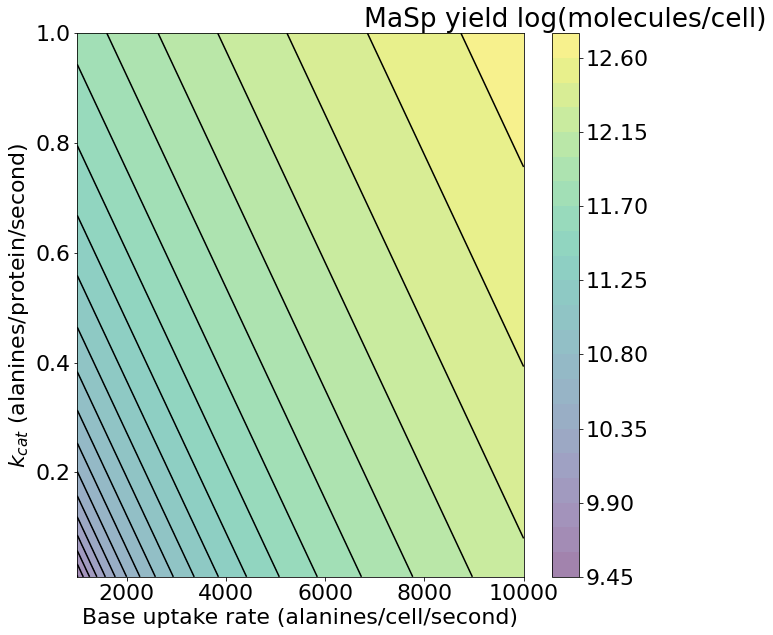

In [13]:
%%time
a = yield_plotter(plasmids=1000, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake_values=np.linspace(1000,10000,100), k_cat_values=np.linspace(0.01, 1, 100), expression_state=[True, True], plot_type='Contour', num_iterations=1000)

In [112]:
def multiple_contour_plotter(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values, k_cat_values, num_iterations):
    masp_yield = [np.zeros([len(base_uptake_values),len(k_cat_values)]), np.zeros([len(base_uptake_values),len(k_cat_values)]), np.zeros([len(base_uptake_values),len(k_cat_values)]), np.zeros([len(base_uptake_values),len(k_cat_values)])]
    expression_state = [[False, False], [True, False], [False, True], [False, True]]
    for i in range(len(base_uptake_values)):
        print(i)
        for j in range(len(k_cat_values)):
            for k in range(len(expression_state)):
                masp_yield[k][i][j] = np.log(final_yield(plasmids, cycA, alanine_tRNA, intra_alanine, masp, transcription_rate, base_uptake_values[i], k_cat_values[j], expression_state[k][0], expression_state[k][1], num_iterations))
                
    fig, axs = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True, constrained_layout=True)
    
    contours1 = axs[0][0].contour(base_uptake_values, k_cat_values, masp_yield[0], 20, colors='black')
    cp1 = axs[0][0].contourf(base_uptake_values, k_cat_values, masp_yield[0], 20, alpha=0.5)
    axs[0][0].annotate('No expression', (6500, 1.45), size=20)
    axs[0][0].scatter(7230, 0.9953, color='k', s=100)
    
    contours2 = axs[0][1].contour(base_uptake_values, k_cat_values, masp_yield[1], 20, colors='black')
    cp2 = axs[0][1].contourf(base_uptake_values, k_cat_values, masp_yield[1], 20, alpha=0.5)
    axs[0][1].annotate('tRNA expressed', (6150, 1.45), size=20)
    axs[0][1].scatter(7230, 0.9953, color='k', s=100)
    
    contours3 = axs[1][0].contour(base_uptake_values, k_cat_values, masp_yield[2], 20, colors='black')
    cp3 = axs[1][0].contourf(base_uptake_values, k_cat_values, masp_yield[2], 20, alpha=0.5)
    axs[1][0].annotate('cycA expressed', (6200, 1.45), size=20)
    axs[1][0].scatter(7230, 0.9953, color='k', s=100)
    
    contours4 = axs[1][1].contour(base_uptake_values, k_cat_values, masp_yield[3], 20, colors='black')
    cp4 = axs[1][1].contourf(base_uptake_values, k_cat_values, masp_yield[3], 20, alpha=0.5)
    axs[1][1].annotate('Both expressed', (6200, 1.45), size=20)
    axs[1][1].scatter(7230, 0.9953, color='k', s=100)
    
    cbar = fig.colorbar(cp1, ax=axs[:, 1], shrink=0.8, label='MaSp yield/log(molecules/cell)')
    fig.supxlabel(r'Base uptake rate/$s^{-1}$')
    fig.supylabel(r'$k_{cat}/s^{-1}$')
    fig.suptitle(r'Final MaSp yield as a function of $k_{cat}$ and base alanine uptake rate')
    plt.savefig('./Figures/ConcentrationContourPlot.png', bbox_inches='tight')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
CPU times: user 9min 45s, sys: 10.6 s, total: 9min 56s
Wall time: 10min 10s


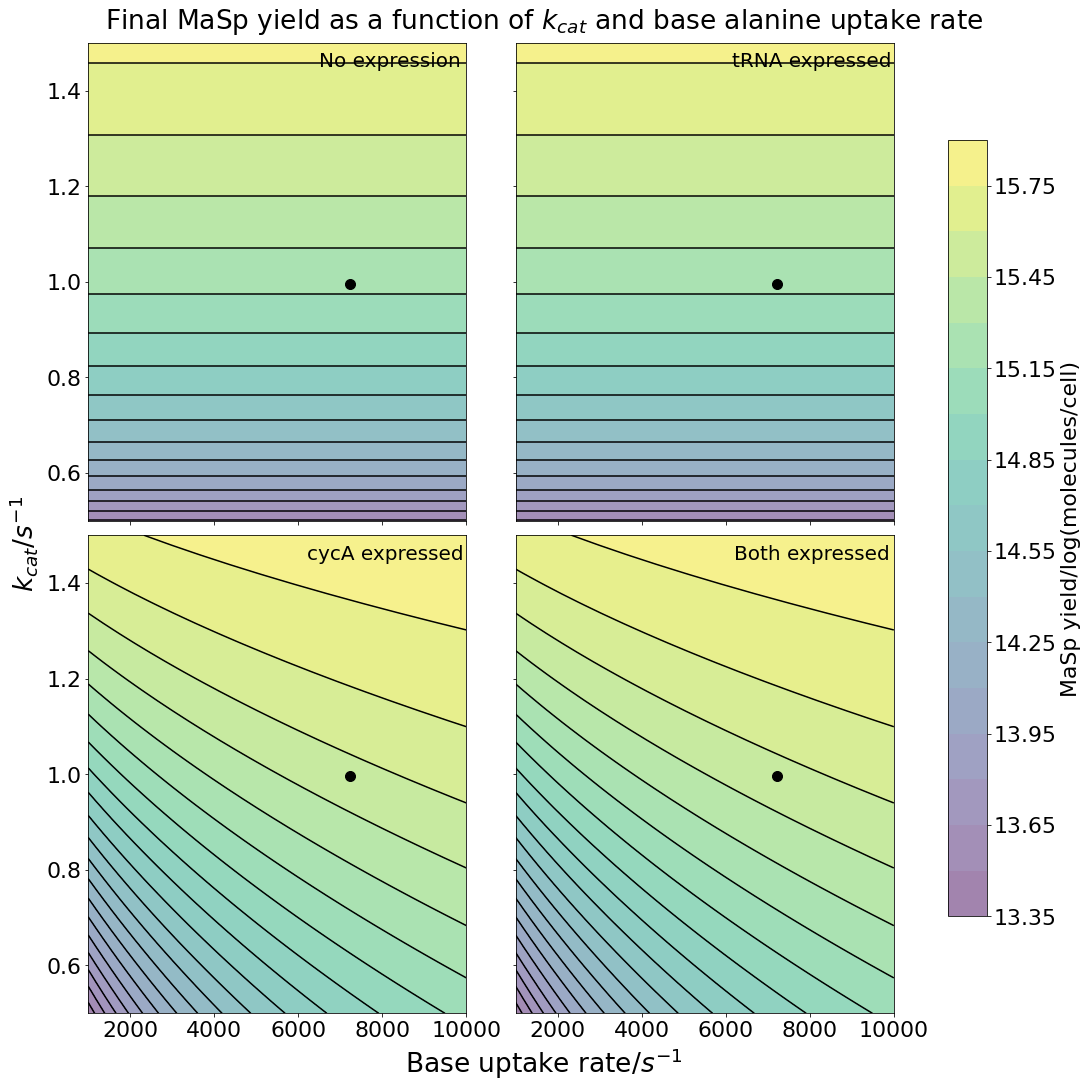

In [114]:
%%time
multiple_contour_plotter(plasmids=1000, cycA=0, alanine_tRNA=4000, intra_alanine=0, masp=0, transcription_rate=45, base_uptake_values=np.linspace(1000,10000,50), k_cat_values=np.linspace(0.5, 1.5, 50), num_iterations=57600)